# This is a baseline with a purpose of translation and a target audiance.

In [3]:
from openai import OpenAI
import pandas as pd
# dataframe and load of verbs
df = pd.read_csv('verbs.csv')

client = OpenAI()

# Define a translation function using the OpenAI API
def translate_verb(verb):
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
    messages = [
        {
            "role": "system", 
            "content": "Translate the provided Moroccan Darija language verbs into English using word-by-word translation." + 
            "Please fulfill the following conditions when translating."+
            "The translation must contain only the lemma of the translated verb. It should not contain 'to' for example"+
            "Purpose of the translation: To study the accuracy of LLMs on Low resource languages, particularly Darija." + 
            "Target audience: Computational linguists" 
        },
        {
            "role": "user", 
            "content":  f'{verb}'}
    ],
        temperature=0.1  # Deterministic responses
    )
    return completion.choices[0].message.content

df['english_translation'] = df['darija_ar'].apply(translate_verb)


In [9]:
import matplotlib.pyplot as plt
from nltk.corpus import wordnet as wn
from sentence_transformers import SentenceTransformer, util

dataset = df.copy()

columns_to_delete = ['n2', 'n3', 'n4', 'n5', 'n6']
dataset.drop(columns=columns_to_delete, inplace=True)

eng = dataset['eng']
transl = dataset['english_translation']
transl = [verb.replace(" ", "_") for verb in transl]
eng = [verb.replace(" ", "_") for verb in eng]

def max_path_similarity(word1, word2):
    """Calculate the maximum path similarity between two words."""

    synsets1 = wn.synsets(word1, pos=wn.VERB)
    synsets2 = wn.synsets(word2, pos=wn.VERB)
    max_score = 0
    for syn1 in synsets1:
        for syn2 in synsets2:
            score = syn1.path_similarity(syn2)
            if score and score > max_score:
                max_score = score
    return max_score

def evaluate_pairs(threshold=0.5):
    """Evaluating each pair using WordNet path similarity and a threshold."""
    results = []
    for i in range(len(transl)):
        word1, word2 = transl[i], eng[i]
        similarity = max_path_similarity(word1, word2)
        results.append((word1, word2, similarity, similarity >= threshold))
    return results
results = evaluate_pairs()
similarities = [item[2] for item in results]


dataset['similarity'] = similarities
mean_similarity = dataset['similarity'].mean()


print(f'Mean value of similarities is: {mean_similarity}')
dataset.describe()



c:\Users\yassi\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


[(2, 'eat', 'eat', 1.0, True), (3, 'drink', 'drink', 1.0000001192092896, True), (4, 'enter', 'enter', 0.9999999403953552, True), (5, 'exit', 'go out', 0.9226919412612915, True), (6, 'understand', 'understand', 0.9999998211860657, True), (7, 'explain', 'explain', 0.9999999403953552, True), (8, 'read', 'learn', 0.8049945831298828, True), (9, 'read', 'teach', 0.77842777967453, True), (10, 'hear', 'hear', 1.0000001192092896, True), (11, 'see', 'see', 0.9999998807907104, True), (12, 'smell', 'smell', 1.0, True), (13, 'go', 'taste', 0.713788628578186, True), (14, 'Measure', 'touch', 0.7711687684059143, True), (15, 'go', 'go', 0.9999998807907104, True), (16, 'come', 'come', 1.0, True), (17, 'go out', 'ascend', 0.6200301051139832, False), (18, 'descend', 'go down', 0.7887939214706421, True), (19, 'To year', 'swim', 0.3771308660507202, False), (20, 'drown', 'drown', 0.9999998807907104, True), (21, 'wear', 'wear', 1.0000001192092896, True), (22, 'asked', 'take off', 0.6220536231994629, False), (

,similarity
count,1032.000000
mean,0.838443
std,0.153807
min,0.233443
25%,0.738506
50%,0.866299
75%,1.000000
max,1.000000


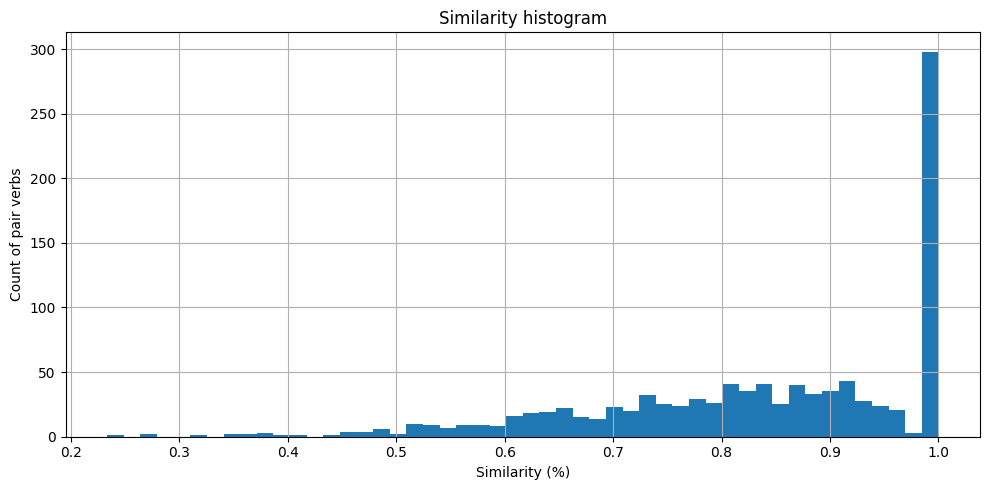

In [10]:
import matplotlib.pyplot as plt

dataset.hist(bins=50, figsize=(10,5))
plt.xlabel('Similarity (%)')
plt.ylabel('Count of pair verbs')
plt.title('Similarity histogram')
plt.tight_layout()
plt.grid(True)
plt.show()


In [22]:
count_df = dataset[dataset['similarity'] <= 0.9]
print(count_df['similarity'].count())


597


In [ ]:
from openai import OpenAI
import pandas as pd
# dataframe and load of verbs
df = pd.read_csv('verbs.csv')

client = OpenAI()

# Define a translation function using the OpenAI API
def translate_verb(verb):
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
    messages = [
        {
            "role": "system", 
            "content": "Translate the provided Moroccan Darija language verbs into English using word-by-word translation." + 
            "Please fulfill the following conditions when translating:"+
            "The output must not be an infinitive verb. No explanations are needed in the output"+

            "The translation must contain only the lemma of the translated verb. It should not contain 'to' for example"
        },
        {
            "role": "user", 
            "content":  f'{verb}'}
    ],
        temperature=0.1  # Deterministic responses
    )
    return completion.choices[0].message.content

df['english_translation'] = df['darija_ar'].apply(translate_verb)
